In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    ans = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    return ans


def relu(z):
    z[z < 0] = 0
    return z


def relu_prime(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z


def J(y_hat, images, labels, alpha=0.):
    x = images
    y = labels
    m = x.shape[0]
    cost_mat = np.multiply(y, np.log(y_hat))
    cost = (-1. / m) * np.sum(np.sum(cost_mat, axis=1))
    #     cost += (alpha / (2 * m)) * np.linalg.norm(w)
    return cost


def J2(w1, w2, b1, b2, images, labels, alpha=0.): # TODO: Temp scaffold, remove this later on merge with the above function
    x = images
    y = labels
    m = x.shape[0]
    h1, y_hat = feedforward(w1, w2, b1, b2, x, y)
    cost_mat = np.multiply(y, np.log(y_hat))
    cost = (-1. / m) * np.sum(np.sum(cost_mat, axis=1))
    #     cost += (alpha / (2 * m)) * np.linalg.norm(w)
    return cost


def feedforward(w1, w2, b1, b2, images, labels, aplha=.0):
    x = images
    h1 = relu(x.dot(w1.T) + b1)
    y_hat = softmax(h1.dot(w2.T) + b2)
    return h1, y_hat



def grad_layer2(h1, y_hat, images, labels, alpha=0.):
    x = images
    y = labels
    h2 = (y_hat - y)
    dJ_dw2 = h2.T.dot(h1)
    dJ_b2 = h2
    return dJ_dw2, dJ_b2


def grad_layer1(h1, y_hat, w_1, w_2, images, labels, alpha=0.):
    x = images
    y = labels
    dJ_dh1 = (y_hat - y).dot(w_2)
    g = dJ_dh1 * relu_prime(x.dot(w_1.T))
    dJ_dw1 = g.T.dot(x)
    dJ_db1 = g
    return dJ_dw1, dJ_db1


def gradJ_w2(h1, y_hat, images, labels, alpha=0.):
    x = images
    y = labels
    return (y_hat - y).T.dot(h1)


def gradJ_w1(h1, y_hat, w_1, w_2, images, labels, alpha=0.):
    x = images
    y = labels
    dJ_dh1 = (y_hat - y).dot(w_2)
    g = dJ_dh1 * relu_prime(x.dot(w_1.T))
    # vec_input = x.reshape(x.shape[0] * x.shape[1], )
    return g.T.dot(x)


def gradientDescent(trainingimages, trainingLabels, alpha=0.):
    x = trainingimages
    y = trainingLabels
    dimensions = x.shape[1]
    classes = y.shape[1]
    sample_size = x.shape[0]
    cost_history = np.array([])
    batch_history = np.array([])
    epsilon = 1e-5

    batch_size = 200
    h_nodes = 30
    epochs = 50

    mu, sigma = 0, 0.1
    w1 = np.random.normal(mu, sigma, (h_nodes, dimensions))
    # TODO: ask professor whether using batch_size here is the right way (probably not)
    b1 = np.ones((1, h_nodes))
    w2 = np.random.normal(mu, sigma, (classes, h_nodes))
    b2 = np.ones((1, classes))

    num_batches = sample_size / batch_size
    for e in xrange(epochs):
        x_y = np.append(x, y, axis=1)
        np.random.shuffle(x_y)
        x_s = x_y[:, :dimensions]
        y_s = x_y[:, dimensions:]
        for i in xrange(num_batches):
            start = i * batch_size
            end = start + batch_size
            x_batch = x_s[start:end]
            y_batch = y_s[start:end]
            h1, y_hat = feedforward(w1, w2, b1, b2, x_batch, y_batch)  # Do feedforward pass
            # gradw2 = gradJ_w2(h1, y_hat, x_batch, y_batch)
            gradw2, gradb2 = grad_layer2(h1, y_hat, x_batch, y_batch)
            w2 -= (epsilon * gradw2)
            b2 -= (epsilon * np.sum(gradb2, axis=0, keepdims=True))
            # gradw1 = gradJ_w1(h1, y_hat, w1, w2, x_batch, y_batch)
            gradw1, gradb1 = grad_layer1(h1, y_hat, w1, w2, x_batch, y_batch)
            w1 -= (epsilon * gradw1)
            b1 -= (epsilon * np.sum(gradb1, axis=0, keepdims=True))

            cost = J(y_hat, x_batch, y_batch, alpha)
            batch_history = np.append(batch_history, cost)
            
        cost_history = np.append(cost_history, cost)
        if e % 2 == 0:
            print "Epochs: ", e, "Cost: ", cost, "||w1|| :", np.linalg.norm(w1), "||w2|| :", np.linalg.norm(w2)
    
    plt.plot(np.linspace(1, epochs * num_batches, epochs *num_batches), batch_history, label="Training Cost")
    plt.legend()
    plt.ylabel('Training Cost')
    plt.xlabel('Epochs * batches')
    plt.title("Cross-entropy loss values")
    plt.show()
    plt.plot(np.linspace(1, epochs, epochs), cost_history, label="Training Cost")
    plt.legend()
    plt.ylabel('Training Cost')
    plt.xlabel('Epochs')
    plt.title("Cross-entropy loss values")
    plt.show()
    return w1, w2, b1, b2


def reportCosts(w1, w2, b1, b2, trainingimages, trainingLabels, testingimages, testingLabels, alpha=0.):
    print "Training cost: {}".format(J2(w1, w2, b1, b2, trainingimages, trainingLabels, alpha))
    print "Testing cost:  {}".format(J2(w1, w2, b1, b2, testingimages, testingLabels, alpha))


def report_accuracy(w1, w2, b1, b2, images, labels):
    h1, y_hat = feedforward(w1, w2, b1, b2, images, labels)
    acc = np.mean(np.argmax(y_hat, axis=1) == np.argmax(labels, axis=1))
    return acc * 100


def predict(image, label, weight):
    predicted = np.argmax(image.dot(weight))
    real = np.argmax(label)
    return predicted, real


if __name__ == "__main__":
    # Load data
    if ('trainingImages' not in globals()):
        trainingImages = np.load("datasets/mnist_train_images.npy")
        trainingLabels = np.load("datasets/mnist_train_labels.npy")
        validationImages = np.load("datasets/mnist_validation_images.npy")
        validationLabels = np.load("datasets/mnist_validation_labels.npy")
        testingImages = np.load("datasets/mnist_test_images.npy")
        testingLabels = np.load("datasets/mnist_test_labels.npy")

    import time

    start = time.time()
    alpha = 1e2
    w1, w2, b1, b2 = gradientDescent(trainingImages, trainingLabels, alpha)

    # reportCosts(w1, w2, b1, b2, trainingImages, trainingLabels, validationImages, validationLabels)
    print "Accuracy is", report_accuracy(w1, w2, b1, b2, validationImages, validationLabels), "%"
    dt = int(time.time() - start)
    print("Execution time %d sec" % dt)

# testw = np.ndarray.flatten(w)
# from scipy.optimize import check_grad
# print "Check grad value is ", check_grad(J, gradJ, testw, trainingImages, trainingLabels, 1e2)


Epochs:  0 Cost:  2.00463498221 ||w1|| : 15.406017329 ||w2|| : 1.74568535835


In [131]:
reportCosts(w1, w2, b1, b2, validationImages, validationLabels, testingImages, testingLabels)
report_accuracy(w1, w2, b1, b2, testingImages, testingLabels)

Training cost: 1.61714526262
Testing cost:  1.61892423238


58.68

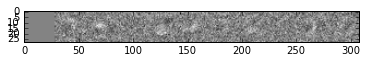

In [111]:
        image = np.zeros((28,28))
        for i in xrange(0,10):
            temp = w1[i].reshape(28,28)
            image = np.concatenate((image,temp), axis=1)
        img_plt = plt.imshow(image, cmap='gray')
        plt.show(img_plt)

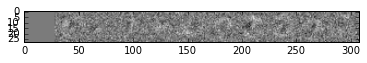

In [112]:
        image = np.zeros((28,28))
        for i in xrange(10,20):
            temp = w1[i].reshape(28,28)
            image = np.concatenate((image,temp), axis=1)
        img_plt = plt.imshow(image, cmap='gray')
        plt.show(img_plt)

In [115]:
        image = np.zeros((28,28))
        for i in xrange(20,30):
            temp = w1[i].reshape(28,28)
            image = np.concatenate((image,temp), axis=1)
        img_plt = plt.imshow(image, cmap='gray')
        plt.show(img_plt)

IndexError: index 20 is out of bounds for axis 0 with size 20

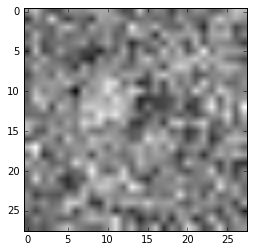

In [116]:
image = w1[10].reshape(28,28)
img_plt = plt.imshow(image, cmap='gray')
plt.show(img_plt)